# pip install pandas
# pip install geopy
# pip install pyephem
# pip install matplotlib

In [1]:
from datetime import date, time, datetime, timedelta
import pandas as pd
import enphase as e
import matplotlib.pyplot as pyplot
import numpy as np
import pprint

In [2]:
#e.print_environ()
pp = pprint.PrettyPrinter(indent=4)
a_few_days_ago = e.today() - timedelta(days=3)
not_long_ago = e.today() - timedelta(days=30)

In [3]:
e.save_to_files(complete_days=False, start_date=a_few_days_ago)

/Users/electronhead/dev/data/enphase/stats_2021-09-03.csv
SUCCESS: 160 rows written to  /Users/electronhead/dev/data/enphase/stats_2021-09-03.csv
/Users/electronhead/dev/data/enphase/stats_2021-09-04.csv
SUCCESS: 161 rows written to  /Users/electronhead/dev/data/enphase/stats_2021-09-04.csv
/Users/electronhead/dev/data/enphase/stats_2021-09-05.csv
SUCCESS: 159 rows written to  /Users/electronhead/dev/data/enphase/stats_2021-09-05.csv
/Users/electronhead/dev/data/enphase/stats_2021-09-06.csv
SUCCESS: 114 rows written to  /Users/electronhead/dev/data/enphase/stats_2021-09-06.csv


{'dates_processed': 4, 'last_date_processed': datetime.date(2021, 9, 6)}

In [4]:
data = e.compute_data_frame()
e.augment_data_frame(data)
data_copy = data.copy()
# data15 = e.compute_data_frame(increment=15)
# data30 = e.compute_data_frame(increment=30)
data60 = e.compute_data_frame(increment=60)

In [38]:
def slap(arg):
    print_glee = lambda glee: print(glee, '\n')
    if flea == 0: # PIVOT FORWARD WATT HOURS BY DATE AND TIME
        glee = e.pivot_by_date_time(data60, values=e.f, start_date=not_long_ago, stop_date=e.today(), start_time=time(8,0,0), stop_time=time(21,0,0))
        print_glee(glee)
    elif flea == 1: # PIVOT BACKWARD WATT HOURS BY DATE AND TIME
        glee = e.pivot_by_date_time(data60, values=e.b, start_date=not_long_ago, stop_date=e.today(), start_time=time(8,0,0), stop_time=time(21,0,0))
        print_glee(glee)
    elif flea == 2: # STATS
        glee = e.stats_by_time(data, column=e.wh, start_date=e.online_date(), stop_date=e.today())
        glee.plot(figsize=(15,8),grid=True)
    elif flea == 3: # SUM BY TIME AND PLOT
        glee = data[[e.d,e.wh]].groupby([e.d]).sum()
        glee.plot(figsize=(15,8),grid=True)
    elif flea == 4: # SUM RECENT WATT HOURS
        wh = e.by_date(data[[e.d,e.wh]], not_long_ago, e.today())
        grouped = wh.groupby([e.d]).sum()
        print_glee(grouped)
        print_glee(grouped[e.wh].agg([len,np.sum,np.min,np.mean,np.max]).apply(lambda x: int(x)))
    elif flea == 10: # SUM RECENT WATT HOURS minus ONE YEAR
        wh = e.by_date(data[[e.d,e.wh]], not_long_ago-timedelta(days=365), e.today()-timedelta(days=365))
        grouped = wh.groupby([e.d]).sum()
        print_glee(grouped)
        print_glee(grouped[e.wh].agg([len,np.sum,np.min,np.mean,np.max]).apply(lambda x: int(x)))
    elif flea == 5: # PLOT YESTERDAY'S WATT HOURS
        glee = e.by_date(data, e.yesterday(), e.yesterday())[[e.t,e.wh]]
        glee.plot(x="time",figsize=(15,8),grid=True)
    elif flea == 6: # PLOT TODAY'S WATT HOURS
        glee = e.by_date(data, e.today(), e.today())[[e.t,e.wh]]
        glee.plot(x="time",figsize=(15,8),grid=True)
    elif flea == 7: # YESTERDAY'S RAW STATS
        pp.pprint(e.request_stats(e.yesterday()).json())
    elif flea == 8: # TODAY'S RAW STATS
        pp.pprint(e.request_stats(e.today()).json())
    elif flea == 9: # SUM OF PGE WATT HOURS FOR LAST TIME PERIOD
        date1 = date(2021,7,27)
        date2 = date(2021,8,24)
        glee = e.by_date(data, date1, date2)[e.wh].sum()
        print(f"{glee/1000} kWh for prior PGE billing period ({date1} to {date2})\n")
    elif flea == 11: # 31_day rolling aggregation -- sum, min, mean, max
        wh = e.by_date(data[[e.d,e.wh]], e.pge_online_date(), e.today())
        grouped = wh.groupby([e.d]).sum()
        rolling = grouped.rolling(31).agg([np.sum])
        print_glee(rolling)
        rolling.plot(figsize=(15,8),grid=True)
        rolling = grouped.rolling(31).agg([np.min])
        rolling.plot(figsize=(15,8),grid=True)
        rolling = grouped.rolling(31).agg([np.mean])
        rolling.plot(figsize=(15,8),grid=True)
        rolling = grouped.rolling(31).agg([np.max])
        rolling.plot(figsize=(15,8),grid=True)
        #print_glee(rolling)
        

+++++++++++++++++
flea: 11
+++++++++++++++++
           watt_hours
                  sum
date                 
2020-03-04        NaN
2020-03-05        NaN
2020-03-06        NaN
2020-03-07        NaN
2020-03-08        NaN
...               ...
2021-09-02   925174.0
2021-09-03   913708.0
2021-09-04   906771.0
2021-09-05   908933.0
2021-09-06   918396.0

[552 rows x 1 columns] 



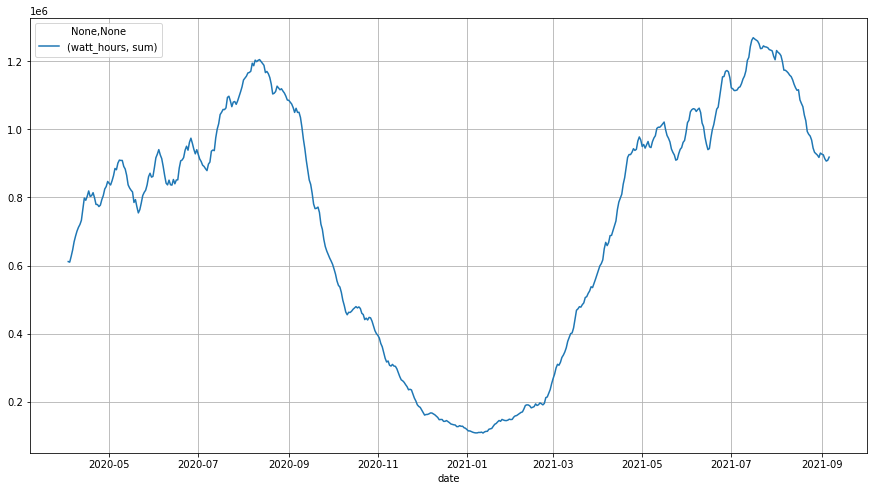

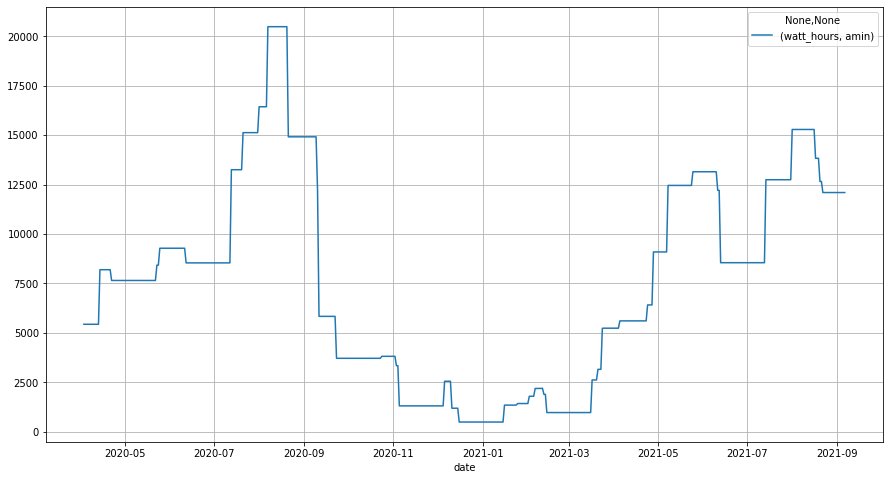

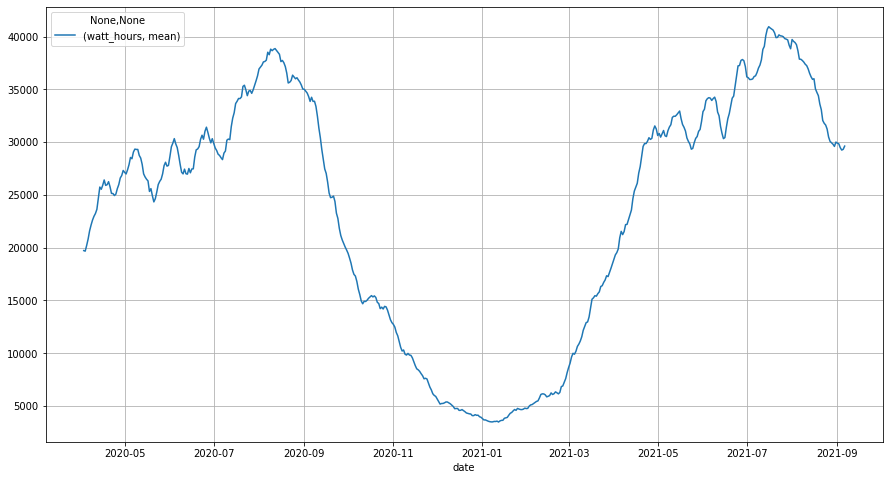

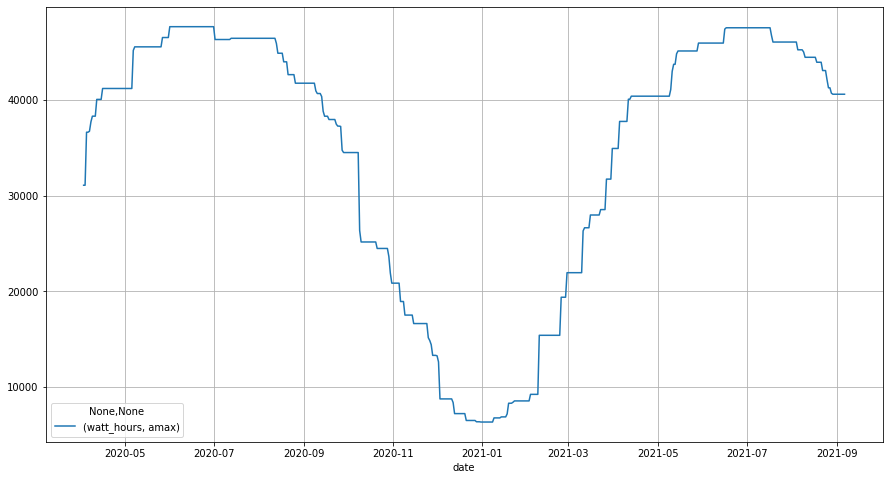

In [39]:
#for flea in [9, 4, 10,0,1,3]:
for flea in [11]:
    print('+++++++++++++++++')
    print('flea:', flea)                
    print('+++++++++++++++++')
    slap(flea)

<AxesSubplot:xlabel='time'>

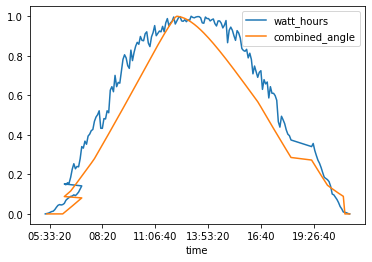

In [33]:
col = e.combined
angle_date = date(2021,6,21)
kwh = e.by_date(data, e.pge_online_date(), e.today()).groupby(e.t)
angles = e.by_date(data, angle_date, angle_date).groupby(e.t)
kwh_maxed = kwh[e.wh].agg(np.max)
angles_maxed = angles[col].agg(np.max)
kwh_normalized = pd.DataFrame(kwh_maxed)/kwh_maxed.max()
angle_normalized = pd.DataFrame(angles_maxed)/angles_maxed.max()
normalized = kwh_normalized.join(angle_normalized, on='time')
normalized_with_ratio = normalized.assign(ratio = lambda x: x[e.wh] / x[col])
normalized.plot()

In [ ]:
col = e.alt
angle_date = date(2021,6,21)
kwh = e.by_date(data, e.online_date(), e.today()).groupby(e.t)
angles = e.by_date(data, angle_date, angle_date).groupby(e.t)
kwh_maxed = kwh[e.wh].agg(np.max)
angles_maxed = angles[col].agg(np.max)
kwh_normalized = pd.DataFrame(kwh_maxed)/kwh_maxed.max()
angle_normalized = pd.DataFrame(angles_maxed)/angles_maxed.max()
normalized = kwh_normalized.join(angle_normalized, on='time')
normalized_with_ratio = normalized.assign(ratio = lambda x: x[e.wh] / x[col])
normalized.plot()

In [ ]:
angle_date = date(2021,6,21)
angles = e.by_date(data, angle_date, angle_date)
angles[[e.t, e.alt, e.south, e.west, e.combined]].plot(x=e.t)

In [ ]:
wh = pd.DataFrame(data.groupby(e.t)[e.wh].max(), columns=[e.wh])
angles = pd.DataFrame(e.by_date(data, date(2020,6,21), date(2020,6,21)).groupby(e.t)[e.combined].max(), columns=[e.combined])
joined = wh.join(angles, on=e.t)
joined.assign(factor=lambda x: x[e.wh] / x[e.combined])
print(wh)
print(angles)
print(joined.head(60))

In [ ]:
angle_date = date(2020,6,21)
angles_sum = e.by_date(data, angle_date, angle_date)[[e.combined]].sum()
print(angles_sum)

In [ ]:
data.groupby(e.t)[e.wh].max().sum()

In [ ]:
data